In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import utils

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, f1_score

from xgboost import XGBClassifier

In [2]:
def split(X, y, test_size=0.2):
    X = X.to_numpy()
    y = y.to_numpy()
    sss = StratifiedShuffleSplit(test_size = test_size, random_state=0)
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
    return (X_train, y_train, X_test, y_test)

In [3]:
def PlotConfusionMatrix(classifier, X, y, normalize='true', axes=None):
    '''
    Plots the confusion matrix of X based on predictions
    from classifier.
    
    @param classifier Classifier for doing predictions.
    @param X Input data.
    @param y Output labels.
    @param normalize Specifies the mode of normalization.
        It takes values 'true', 'pred' and 'all'.
    '''
    plot = plot_confusion_matrix(classifier, X, y, normalize = normalize,
                                 display_labels=CLASS_NAMES, cmap=plt.cm.Blues, ax=axes)

In [4]:
def TrainingPipeline(model, X_train, y_train, X_val, y_val):
    
    # A dictionary to store the history of the trained model.
    history = {}
    
    # Training and Predicting.
    model.fit(X_train, y_train)
    y_train_hat = model.predict(X_train)
    y_val_hat = model.predict(X_val)
    history["model"] = model
    history["y_train_hat"] = y_train_hat
    history["y_val_hat"] = y_val_hat
    
    # Plotting confusion matrices.
    fig, axes = plt.subplots(1, 2, figsize=(13,5))
    PlotConfusionMatrix(model, X_train, y_train, axes=axes[0])
    PlotConfusionMatrix(model, X_val, y_val, axes=axes[1])
    axes[0].set_title("Confustion matrix of Train Data")
    axes[1].set_title("Confustion matrix of Test Data")
    
    # Calculating the scores.
    train_score = utils.Score(f1_score, y_train, y_train_hat, average="weighted").round(4)
    val_score = utils.Score(f1_score, y_val, y_val_hat, average="weighted").round(4)
    history["train_score"] = train_score
    history["val_score"] = val_score
    
    print("Training Score is", train_score)
    print("Validation Score is", val_score)
    return history

In [5]:
train = pd.read_csv("data/train_age_dataset.csv")
test = pd.read_csv("data/test_age_dataset.csv")

In [6]:
CLASS_NAMES = list(train["age_group"].unique())

In [7]:
drop = ["Unnamed: 0", "userId"]
train = utils.DropFeatures(drop, train)
test = utils.DropFeatures(drop, test)

In [8]:
X, y = utils.SplitLabels(train, "age_group")
X_train, y_train, X_val, y_val = split(X, y)

In [9]:
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

## Logistic Regression

/home/rishabh/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Score is 0.5453
Validation Score is 0.5446


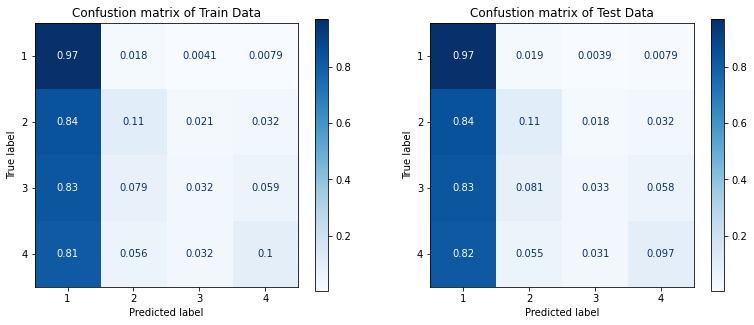

In [10]:
logistic_clf = LogisticRegression(random_state=42)
history_logistic = TrainingPipeline(logistic_clf, X_train, y_train, X_val, y_val)

In [11]:
test_pred = logistic_clf.predict(test)
test_pred = pd.Series(test_pred, name="prediction")
test_pred.to_csv("baseline.csv", index=False)

## XGBoost

Training Score is 0.7807
Validation Score is 0.7492


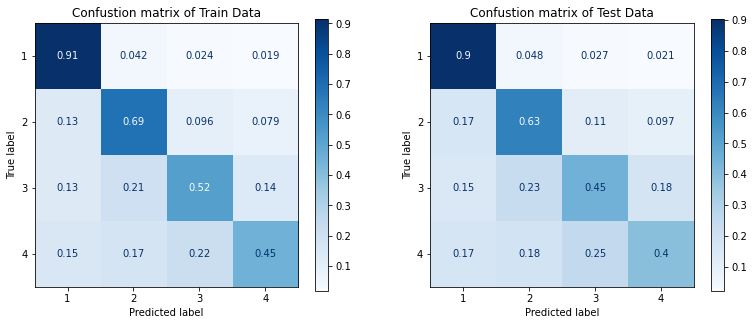

In [12]:
xgb_clf = XGBClassifier()
history_xgb = TrainingPipeline(xgb_clf, X_train, y_train, X_val, y_val)

AttributeError: 'numpy.ndarray' object has no attribute 'unique'